# **Lab8 - 7 Nov 2024**

## **202201260 - Dishant Patel**

### **Importing Libraries**

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Importing Dataset**

In [37]:
df = pd.read_csv("https://raw.githubusercontent.com/pdishant5/IT-462-Exploratory-Data-Analysis-Assignments/refs/heads/main/LabAssignment7/mental_health_dataset.csv")

### **Pre-processing of the Data**

In [38]:
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [39]:
# Get the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [40]:
# Summary statistics for numerical columns
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [41]:
df['Sleep Duration'].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', '9-5', 'Pune', '9-5 hours'], dtype=object)

In [42]:
# Check for missing values
df.isnull().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,36630
Academic Pressure,112803
Work Pressure,27918
CGPA,112802


In [43]:
df.shape

(140700, 20)

### **Handling Missing Values**

In [44]:
#removing the rows where NaN is there in 'Dietary Habits', 'Degree', 'Financial Stress'.
df_copy = df.copy()
df_copy = df_copy.dropna(subset=['Dietary Habits', 'Degree', 'Financial Stress'])

In [45]:
# Check for missing values
df_copy.isnull().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,36622
Academic Pressure,112798
Work Pressure,27913
CGPA,112797


### **Imputing Missing Values**

In [46]:
#Imputation for Numerical Columns:
df_copy['CGPA'].fillna(df_copy['CGPA'].mean(), inplace=True)
df_copy['Academic Pressure'].fillna(df_copy['CGPA'].mean(), inplace=True)
df_copy['Study Satisfaction'].fillna(df_copy['CGPA'].mean(), inplace=True)
df_copy['Job Satisfaction'].fillna(df_copy['CGPA'].mean(), inplace=True)
df_copy['Work Pressure'].fillna(df_copy['CGPA'].mean(), inplace=True)

<ipython-input-46-3ce4ebad3315>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['CGPA'].fillna(df_copy['CGPA'].mean(), inplace=True)
<ipython-input-46-3ce4ebad3315>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [47]:
#Imputation for Categorical Columns:
df_copy['Profession'].fillna(df_copy['Profession'].mode()[0], inplace=True)

<ipython-input-47-e4c51275fb46>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Profession'].fillna(df_copy['Profession'].mode()[0], inplace=True)


In [48]:
# Check for missing values
df_copy.isnull().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0


In [49]:
df_copy.shape

(140690, 20)

In [50]:
df_copy.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,7.65867,5.00000,7.65867,7.65867,2.00000,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,7.65867,4.00000,7.65867,7.65867,3.00000,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Teacher,5.00000,7.65867,8.97000,2.00000,7.65867,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,7.65867,5.00000,7.65867,7.65867,1.00000,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,7.65867,1.00000,7.65867,7.65867,1.00000,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


### **Outliers: Detection and Imputation**

In [51]:
# Separating the numerical and categorical variables
df_numeric_list= ['id', 'Age', 'Job Satisfaction', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']
df_cat_list = ['Name', 'Gender', 'City', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

# Separating the numerical and categorical dataframes
df_cleaned_numeric = df_copy[df_numeric_list]
df_cleaned_cat = df_copy[df_cat_list]

{'whiskers': [<matplotlib.lines.Line2D at 0x7b6901d69150>,
 'caps': [<matplotlib.lines.Line2D at 0x7b6901d6bd00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b6901d6aad0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b6901d6bdc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b6901d680a0>],
 'means': []}

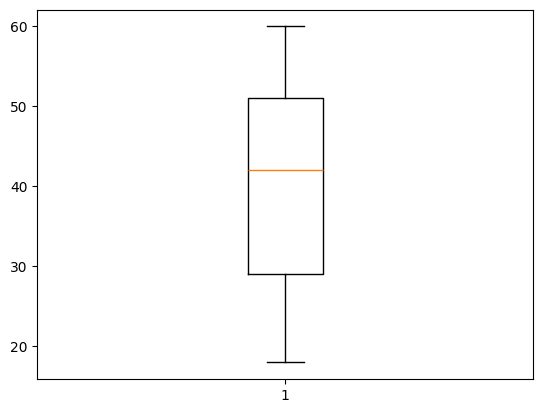

In [52]:
# Checking for any outliers in the "Age" variable
plt.boxplot(df_cleaned_numeric['Age'])

In [53]:
# Looking for the unique values and their counts of the target variable "Depression"
df_copy['Depression'].value_counts()

,count
Depression,
0,115127
1,25563


In [54]:
df_depression = df_cleaned_numeric['Depression']
df_cleaned_numeric.drop('Depression', axis=1, inplace=True)

<ipython-input-54-357a21768dc9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_numeric.drop('Depression', axis=1, inplace=True)


In [55]:
# Create a copy of the original DataFrame to work on
df_no_outliers = df_cleaned_numeric.copy()

# Loop through each column in the DataFrame
for column in df_no_outliers.columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
    Q1 = df_no_outliers[column].quantile(0.25)
    Q3 = df_no_outliers[column].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define outlier criteria (1.5 times the IQR)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to remove outliers
    df_no_outliers = df_no_outliers[~((df_no_outliers[column] <= lower_bound) | (df_no_outliers[column] >= upper_bound))]

# Display the resulting DataFrame shape and confirm no values are outside bounds
print("Shape after removing outliers:", df_no_outliers.shape)

Shape after removing outliers: (0, 9)


In [56]:
# Create a copy of the original DataFrame to work on
df_cleaned = df_cleaned_numeric.copy()

# Loop through each column in the DataFrame
for column in df_cleaned.columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define outlier criteria (1.5 times the IQR)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values outside the bounds using clip
    df_cleaned[column] = df_cleaned[column].clip(lower=lower_bound, upper=upper_bound)

# Display the resulting DataFrame shape and confirm no values are outside bounds
print("Shape after capping outliers:", df_cleaned.shape)

Shape after capping outliers: (140690, 9)


In [57]:
df_cleaned_cat.head()

,Name,Gender,City,Working Professional or Student,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
0,Aaradhya,Female,Ludhiana,Working Professional,Chef,More than 8 hours,Healthy,BHM,No,No
1,Vivan,Male,Varanasi,Working Professional,Teacher,Less than 5 hours,Unhealthy,LLB,Yes,No
2,Yuvraj,Male,Visakhapatnam,Student,Teacher,5-6 hours,Healthy,B.Pharm,Yes,No
3,Yuvraj,Male,Mumbai,Working Professional,Teacher,Less than 5 hours,Moderate,BBA,Yes,Yes
4,Rhea,Female,Kanpur,Working Professional,Business Analyst,5-6 hours,Unhealthy,BBA,Yes,Yes


### **Data Transformation**

In [58]:
# Separating the nominal and ordinal variables
df_cat_nominal_list = ['Name', 'Gender' , 'City', 'Working Professional or Student', 'Profession', 'Have you ever had suicidal thoughts ?', 'Degree', 'Family History of Mental Illness']
df_cat_ordinal_list = ['Sleep Duration', 'Dietary Habits']

# Separating the nominal and ordinal dataframes
df_cat_nominal= df[df_cat_nominal_list]
df_cat_ordinal= df[df_cat_ordinal_list]

**Categorical Encoding:**

In [59]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Make a copy of the DataFrame to avoid the warning
df_cat_nominal_encoded = df_cat_nominal.copy()

# Apply label encoding to each column
for column in df_cat_nominal_encoded.columns:
    df_cat_nominal_encoded[column] = label_encoder.fit_transform(df_cat_nominal_encoded[column])

# Display the first few rows of the encoded DataFrame
df_cat_nominal_encoded.head()

,Name,Gender,City,Working Professional or Student,Profession,Have you ever had suicidal thoughts ?,Degree,Family History of Mental Illness
0,11,0,50,1,10,0,33,0
1,407,1,93,1,55,1,63,0
2,417,1,97,0,64,1,21,0
3,417,1,64,1,55,1,28,1
4,286,0,37,1,9,1,28,1


In [60]:
df['Sleep Duration'].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', '9-5', 'Pune', '9-5 hours'], dtype=object)

In [61]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Make a copy of the DataFrame to avoid the warning
df_cat_ordinal_encoded = df_cat_ordinal.copy()

# Apply label encoding to each column
for column in df_cat_ordinal_encoded.columns:
    df_cat_ordinal_encoded[column] = label_encoder.fit_transform(df_cat_ordinal_encoded[column])

# Display the first few rows of the encoded DataFrame
df_cat_ordinal_encoded.head()

,Sleep Duration,Dietary Habits
0,29,7
1,27,20
2,15,7
3,27,15
4,15,20


In [62]:
# Concatenate df_cat_ordinal_encoded and df_cat_nominal_encoded along columns
df_cat_encoded = pd.concat([df_cat_ordinal_encoded, df_cat_nominal_encoded], axis=1)

# Display the first few rows of the combined DataFrame
df_cat_encoded.head()

,Sleep Duration,Dietary Habits,Name,Gender,City,Working Professional or Student,Profession,Have you ever had suicidal thoughts ?,Degree,Family History of Mental Illness
0,29,7,11,0,50,1,10,0,33,0
1,27,20,407,1,93,1,55,1,63,0
2,15,7,417,1,97,0,64,1,21,0
3,27,15,417,1,64,1,55,1,28,1
4,15,20,286,0,37,1,9,1,28,1


In [63]:
# Combine the cleaned numeric DataFrame with the encoded categorical DataFrame
df_final = pd.concat([df_cleaned.reset_index(drop=True),
                      df_cat_encoded.reset_index(drop=True),
                      df_depression.reset_index(drop=True)], axis=1)

df_final.head()

,id,Age,Job Satisfaction,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Sleep Duration,Dietary Habits,Name,Gender,City,Working Professional or Student,Profession,Have you ever had suicidal thoughts ?,Degree,Family History of Mental Illness,Depression
0,0.0,49.0,2.00000,7.65867,5.00000,7.65867,7.65867,1.0,2.0,29,7,11,0,50,1,10,0,33,0,0.0
1,1.0,26.0,3.00000,7.65867,4.00000,7.65867,7.65867,7.0,3.0,27,20,407,1,93,1,55,1,63,0,1.0
2,2.0,33.0,7.65867,7.65867,7.65867,7.65867,7.65867,3.0,1.0,15,7,417,1,97,0,64,1,21,0,1.0
3,3.0,22.0,1.00000,7.65867,5.00000,7.65867,7.65867,10.0,1.0,27,15,417,1,64,1,55,1,28,1,1.0
4,4.0,30.0,1.00000,7.65867,1.00000,7.65867,7.65867,9.0,4.0,15,20,286,0,37,1,9,1,28,1,0.0


In [64]:
df_final.shape

(140700, 20)

In [65]:
df_final.dropna(inplace=True)

In [66]:
df_final.isnull().sum()

,0
id,0
Age,0
Job Satisfaction,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Work/Study Hours,0
Financial Stress,0
Sleep Duration,0


### **Model Fitting**

<Axes: >

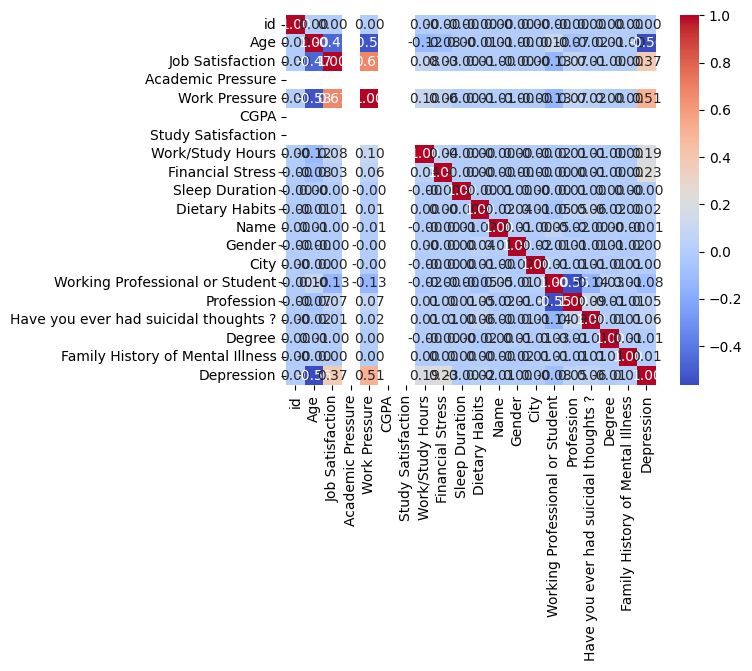

In [67]:
# Calculate the correlation matrix
correlation_matrix = df_final.corr()

# Display the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)

### **Feature Selection**

In [68]:
from sklearn.feature_selection import SelectKBest, f_regression

ids = df_final['id']
X = df_final.drop(columns=['Depression'])  # Features
y = df_final['Depression']  # Target variable

# Select the top K features
selector = SelectKBest(score_func=f_regression, k=5)
X_selected_kbest = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()].tolist()
print("Selected Features:", selected_features)

Selected Features: ['Age', 'Job Satisfaction', 'Work Pressure', 'Work/Study Hours', 'Financial Stress']


**Data Transformation using StandardScaler:**


In [69]:
from sklearn.preprocessing import StandardScaler

# Transformation of X_selected computed using SelectKBest
scaler = StandardScaler()
X_scaled_kbest = scaler.fit_transform(X_selected_kbest)

**Model Selection, Training and Development:**

In [70]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score


#Train-Test Split
X_train, X_test, y_train, y_test, id_train_k, id_test_k = train_test_split(X_scaled_kbest, y, ids, test_size=0.2, random_state=42)

#Select a Model
model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    eval_metric='logloss'  # Optional, to avoid label encoder warning
)

#Fit the Model
model.fit(X_train, y_train)

#Make Predictions
y_pred = model.predict(X_test)  # Predicted classes
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

#Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)


Accuracy: 0.9073494917904613
ROC AUC Score: 0.9524785904631002
